# Simple regression with TensorFlow

Basic TF experiments

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.1


In [51]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Get training data

In [52]:
dat = pd.read_csv("./rbfs/phi_1_reduce.csv")
dat.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,211,212,213,214,215,216,y,site,date,normalized_time
0,0,1.000000,0.933712,0.760067,0.539408,0.333740,0.180022,0.084658,0.034709,0.012406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.033,2005,2023-07-01,0.000000
1,1,0.999950,0.937113,0.765652,0.545377,0.338679,0.183361,0.086546,0.035614,0.012777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.033,2005,2023-07-01,0.002985
2,2,0.999802,0.940433,0.771202,0.551358,0.343658,0.186743,0.088468,0.036539,0.013157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.031,2005,2023-07-01,0.005970
3,3,0.999555,0.943672,0.776715,0.557350,0.348675,0.190169,0.090424,0.037485,0.013547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.023,2005,2023-07-01,0.008955
4,4,0.999208,0.946828,0.782189,0.563351,0.353730,0.193638,0.092414,0.038451,0.013948,...,0.0,0.0,0.0,0.0,0.0,0.0,0.021,2005,2023-07-01,0.011940


In [53]:
dat.shape

(2665, 222)

In [54]:
X_train = dat.iloc[:, 1:218].to_numpy()
y_train = dat['y'].to_numpy()
t_train = dat['normalized_time']

(array([ 17.,  93., 205., 338., 544., 529., 471., 362.,  77.,  29.]),
 array([0.002 , 0.0102, 0.0184, 0.0266, 0.0348, 0.043 , 0.0512, 0.0594,
        0.0676, 0.0758, 0.084 ]),
 <BarContainer object of 10 artists>)

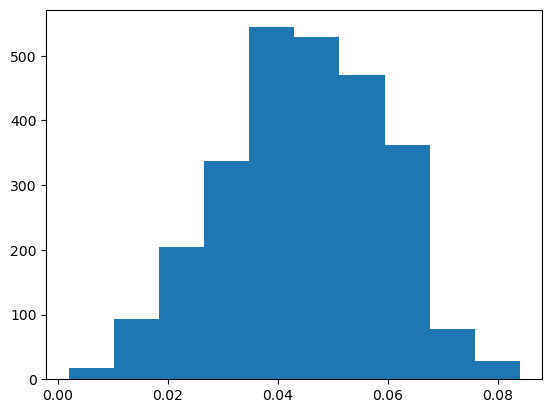

In [55]:
plt.hist(y_train)

Get data for predictions

In [56]:
dat_pred = pd.read_csv("./rbfs/phi_2_reduce.csv")
dat_pred.shape

(94272, 221)

In [68]:
X_test = dat_pred.iloc[:, 1:218].to_numpy()
y_test = dat_pred['y'].to_numpy()
t_test = dat_pred['normalized_time']

(array([1.2350e+03, 9.3960e+03, 1.1907e+04, 1.7141e+04, 2.8420e+04,
        2.0824e+04, 2.2600e+03, 4.0300e+02, 1.0000e+01, 2.0000e+00]),
 array([-0.0083 ,  0.00408,  0.01646,  0.02884,  0.04122,  0.0536 ,
         0.06598,  0.07836,  0.09074,  0.10312,  0.1155 ]),
 <BarContainer object of 10 artists>)

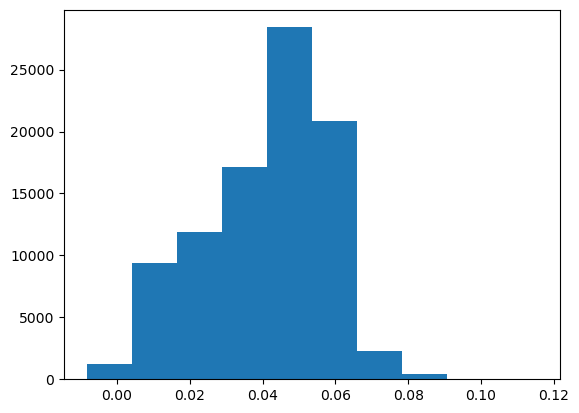

In [58]:
plt.hist(y_test)

## TensorFlow

In [59]:
# Set random seed
tf.random.set_seed(42)
from keras import Sequential
from keras import models
from keras import layers

In [60]:
n_feat = X_train.shape[1]

### Model 1 (Simple TF regression)

In [61]:
model = models.Sequential([
  layers.Dense(512, activation='relu', input_shape=(n_feat,)),
  layers.Dense(512, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='linear')
], name="Initial_model")
model.summary()

Model: "Initial_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               111616    
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dense_14 (Dense)            (None, 256)               131328    
                                                                 
 dense_15 (Dense)            (None, 256)               65792     
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 604417 (2.31 MB)
Trainable params: 6044

In [62]:
# Compile the model
initial_learning_rate = 0.00001
optimizer = keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(loss='mae', metrics=['mae', 'mse'], optimizer='adam')

In [63]:
history=model.fit(X_train, y_train, epochs=50, 
                  batch_size=1024, verbose=1, 
                  validation_split=0.2)

Epoch 1/50
3/3 [==============================] - 0s 46ms/step - loss: 0.1792 - mae: 0.1792 - mse: 0.0345 - val_loss: 0.1128 - val_mae: 0.1128 - val_mse: 0.0134
Epoch 2/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0885 - mae: 0.0885 - mse: 0.0091 - val_loss: 0.0459 - val_mae: 0.0459 - val_mse: 0.0025
Epoch 3/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0289 - mae: 0.0289 - mse: 0.0012 - val_loss: 0.0276 - val_mae: 0.0276 - val_mse: 0.0010
Epoch 4/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0209 - mae: 0.0209 - mse: 6.4465e-04 - val_loss: 0.0207 - val_mae: 0.0207 - val_mse: 6.3641e-04
Epoch 5/50
3/3 [==============================] - 0s 15ms/step - loss: 0.0170 - mae: 0.0170 - mse: 4.3971e-04 - val_loss: 0.0199 - val_mae: 0.0199 - val_mse: 5.6685e-04
Epoch 6/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0173 - mae: 0.0173 - mse: 4.2399e-04 - val_loss: 0.0187 - val_mae: 0.0187 - val_mse: 5.5859e-04
Epoch 7/50

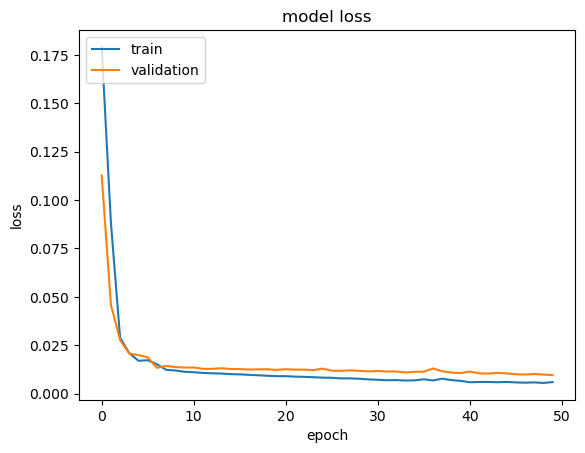

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [65]:
y_test_pred = model.predict(X_test)
#mean_absolute_error(y_test, y_test_pred)

2946/2946 [==============================] - 2s 767us/step


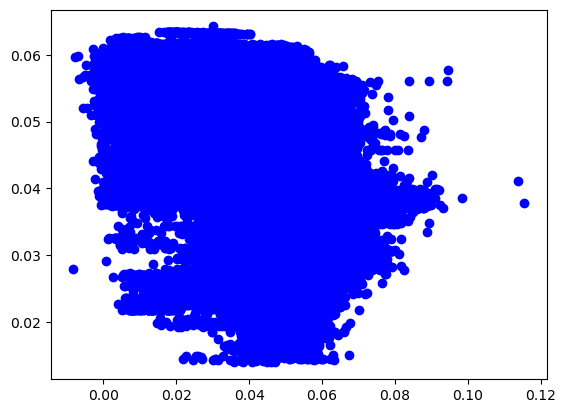

In [66]:
plt.plot(y_test, y_test_pred, 'bo')

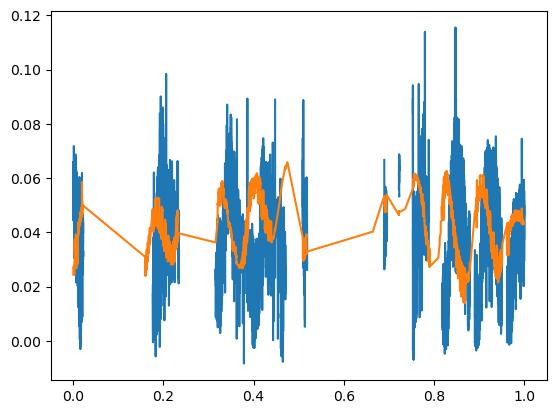

In [69]:
plt.plot(t_test, y_test)
plt.plot(t_test, y_test_pred)
plt.show()